# KHÁM PHÁ DỮ LIỆU

Dữ liệu chứa trong file `tips.csv` chứa thông tin tiền tip của khách hàng tại một nhà hàng. Dữ liệu có các thông tin sau:

- `total_bill`: tổng hoá đơn (USD)
- `tip`: tiền tip/ tiền boa (USD)
- `sex`: giới tính người thanh toán hóa đơn
- `smoker`: có hút thuốc hay không
- `day`: ngày trong tuần
- `time`: thời gian dùng bữa(buổi sáng, buổi trưa, buổi tối)
- `size`: số lượng người tham gia

Bạn hãy thực hiện thống kê mô tả để tìm hiểu về hành vi tip của khách hàng tại nhà hàng

# HIỂU DỮ LIỆU

1. Đọc dữ liệu
2. Xoá cột `Unnamed: 0`
3. Cho biết dữ liệu có bao nhiêu dòng, bao nhiêu thuộc tính.
4. Trong các thuộc tính, thuộc tính nào là thuộc tính phân loại, thuộc tính nào là thuộc tính định lượng
5. Có bao nhiêu nam, bao nhiêu nữ. Tỷ lệ bao nhiêu?
6. Có bao nhiêu người hút thuốc. Tỷ lệ bao nhiêu?
7. Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
8. Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
9. Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
10. Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?

In [5]:
import pandas as pd
#1
tip = pd.read_csv('tips.csv', header=0)

In [6]:
#2
tip = tip.drop(columns=['Unnamed: 0'])

In [7]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [8]:
print("Số lượng dòng: ", tip.shape[0])
print("Số lượng thuộc tính: ", tip.shape[1])

Số lượng dòng:  244
Số lượng thuộc tính:  7


In [9]:
dinh_tinh = tip.select_dtypes(include = "object").columns.tolist()
dinh_luong = tip.select_dtypes(include = "number").columns.tolist()
print("Thuộc tính phân loại", dinh_tinh)
print("Thuộc tính định lượng", dinh_luong)

Thuộc tính phân loại ['sex', 'smoker', 'day', 'time']
Thuộc tính định lượng ['total_bill', 'tip', 'size']


In [10]:
sex_counts = tip["sex"].value_counts()
print("Số lượng nam: ", sex_counts["Male"])
print("Số lượng nữ: ", sex_counts["Female"])
print("Tỷ lệ nam/nữ: ", sex_counts["Male"] / sex_counts["Female"])

Số lượng nam:  157
Số lượng nữ:  87
Tỷ lệ nam/nữ:  1.8045977011494252


In [11]:
smoker_cnt = tip["smoker"].value_counts()
print("Số lượng người hút thuốc: ", smoker_cnt["Yes"])
print("Tỷ lệ người hút thuốc: ", smoker_cnt["Yes"] / smoker_cnt["No"])

Số lượng người hút thuốc:  93
Tỷ lệ người hút thuốc:  0.6158940397350994


In [12]:
# Ngày nào trong tuần khách hàng hay đến dùng bữa nhất. Tỷ lệ bao nhiêu?
day_counts = tip["day"].value_counts()
print("Ngày khách hàng hay đến nhất: ", day_counts.idxmax())
print("Tỷ lệ khách hàng hay đến vào ngày", day_counts.idxmax(), "là:", day_counts.max() / tip.shape[0])


Ngày khách hàng hay đến nhất:  Sat
Tỷ lệ khách hàng hay đến vào ngày Sat là: 0.35655737704918034


In [13]:
#Nhà hàng phục vụ bữa ăn nào nhiều nhất (Breakfast, Lunch, Dinner)?
time_counts = tip["time"].value_counts()
print("Bữa ăn mà nhà hàng phục vụ nhiều nhất: ", time_counts.idxmax())

Bữa ăn mà nhà hàng phục vụ nhiều nhất:  Dinner


In [14]:
#Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là bao nhiêu người?
size_counts = tip["size"].value_counts()
print("Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là nhóm: ", size_counts.idxmax())


Nhóm khách hàng dùng bữa tại nhà hàng nhiều nhất là nhóm:  2


In [15]:
#Trung bình trong một bữa ăn nhà hàng phục vụ mấy khách?
print("Trung bình trong một bữa ăn nhà hàng phục vụ", tip["size"].mean(), "khách")

Trung bình trong một bữa ăn nhà hàng phục vụ 2.569672131147541 khách


## YẾU TỐ ẢNH HƯỞNG ĐẾN TIỀN TIP

Trong phần này, chúng ta thử tìm hiểu về tiền tip tại nhà hàng và các yếu tố có thể ảnh hưởng đến nó

1. Tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
2. Tỷ lệ tiền tip trên tổng hóa đơn là bao nhiêu?
3. Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
4. Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
5. Thống kê tổng số tiền tip nhận được theo ngày.

In [16]:
#tỷ lệ nhận được tiền tip của nhà hàng là bao nhiêu?
tip_rate = tip["tip"] / tip["total_bill"]
print("Tỷ lệ nhận được tiền tip của nhà hàng là: ", tip_rate.mean())

Tỷ lệ nhận được tiền tip của nhà hàng là:  0.16080258172250472


In [17]:
#Tỷ lệ tiền tip trên tổng hóa đơn của nhà hàng
tip_rate = tip["tip"] / tip["total_bill"]
print("Tỷ lệ tiền tip trên tổng hóa đơn của nhà hàng là: ", tip_rate.mean())

Tỷ lệ tiền tip trên tổng hóa đơn của nhà hàng là:  0.16080258172250472


In [18]:
#Giữa nam và nữ ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
sum_tip_of_male =tip[tip["sex"] == "Male"]["tip"].sum()
sum_tip_of_female = tip[tip["sex"] == "Female"]["tip"].sum()
print("Tổng tiền tip của nam: ", sum_tip_of_male)
print("Tổng tiền tip của nữ: ", sum_tip_of_female)
print("=> Nam tip nhiều hơn nữ")

male_tip = tip[tip["sex"] == "Male"]["tip"].mean()
female_tip = tip[tip["sex"] == "Female"]["tip"].mean()
print("Tỷ lệ tip giữa nam và nữ: ", male_tip / female_tip)
print("=> Nam tip thường xuyên hơn nữ")

Tổng tiền tip của nam:  485.07
Tổng tiền tip của nữ:  246.50999999999996
=> Nam tip nhiều hơn nữ
Tỷ lệ tip giữa nam và nữ:  1.0904091176518467
=> Nam tip thường xuyên hơn nữ


In [19]:
#Giữa người hút thuốc và người không hút thuốc ai tip nhiều tiền hơn, ai tip thường xuyên hơn?
smoker_tip = tip[tip["smoker"] == "Yes"]["tip"]
non_smoker_tip = tip[tip["smoker"] == "No"]["tip"]
print("Người hút thuốc tip trung bình: ", smoker_tip.mean())
print("Người không hút thuốc tip trung bình: ", non_smoker_tip.mean())
print("=> Người hút thuốc tip thường xuyên hơn người không hút thuốc")

Người hút thuốc tip trung bình:  3.008709677419355
Người không hút thuốc tip trung bình:  2.9918543046357615
=> Người hút thuốc tip thường xuyên hơn người không hút thuốc


In [20]:
#Thống kê tổng số tiền tip nhận được theo ngày.
tip_by_day = tip.groupby("day")["tip"].sum()
print("Tổng số tiền tip nhận được theo ngày: ")
print(tip_by_day)

Tổng số tiền tip nhận được theo ngày: 
day
Fri      51.96
Sat     260.40
Sun     247.39
Thur    171.83
Name: tip, dtype: float64


# TRỰC QUAN DỮ LIỆU

Để dễ hình dung, bạn hãy trực quan với một số câu hỏi sau đây:

1. Vẽ đồ thị thể hiện tổng tiền tip theo ngày
2. Vẽ đồ thị thể hiện tổng tiền tip theo bữa ăn (time)
3. Vẽ đồ thị histogram của tổng hoá đơn
4. Vẽ đồ thị boxplot của tổng hoá đơn
5. Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
6. So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.

## Với Matplotlib

Bạn hãy trực quan với thư viện matplotlib

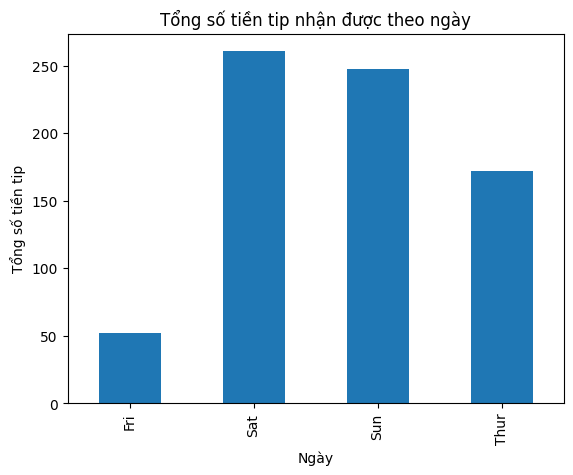

In [21]:
import matplotlib.pyplot as plt
tip_by_day.plot(kind='bar')
plt.title("Tổng số tiền tip nhận được theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Tổng số tiền tip")
plt.show()


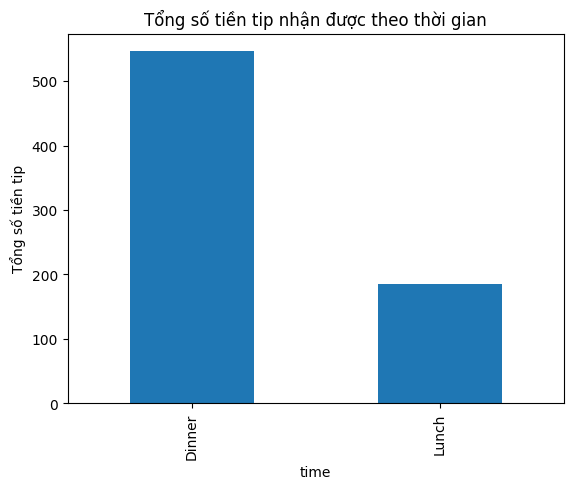

In [23]:
tip_by_time = tip.groupby("time")["tip"].sum()
#print("Tổng số tiền tip nhận được theo thời gian: ")
#print(tip_by_time)
plt.title("Tổng số tiền tip nhận được theo thời gian")
plt.xlabel("Thời gian")
plt.ylabel("Tổng số tiền tip")
tip_by_time.plot(kind='bar')
plt.show()


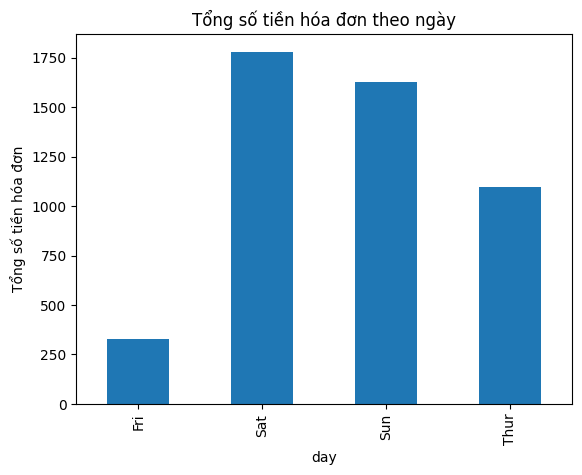

In [25]:
total_bill_by_day = tip.groupby("day")["total_bill"].sum()
plt.title("Tổng số tiền hóa đơn theo ngày")
plt.xlabel("Ngày")
plt.ylabel("Tổng số tiền hóa đơn")
total_bill_by_day.plot(kind='bar')
plt.show()

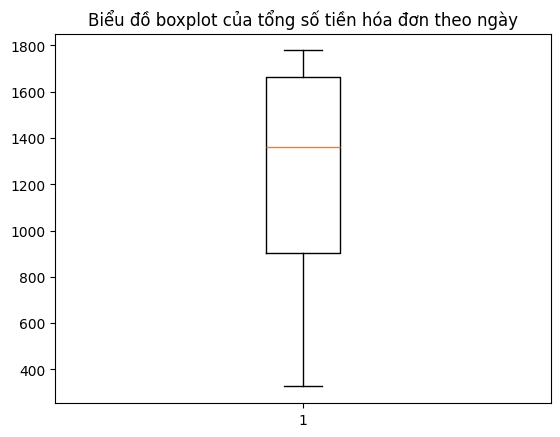

In [26]:
plt.boxplot(total_bill_by_day)
plt.title("Biểu đồ boxplot của tổng số tiền hóa đơn theo ngày")
plt.show()

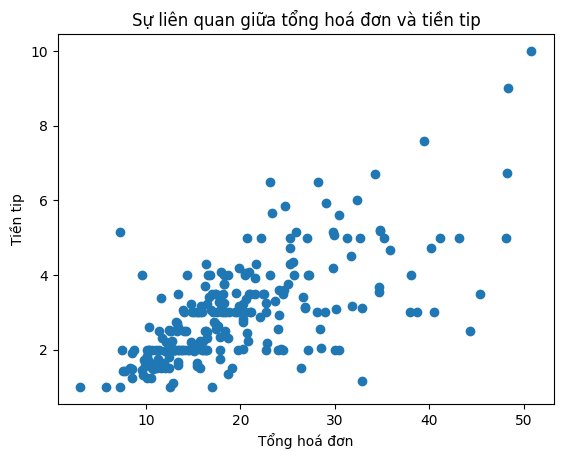

In [27]:
#Vẽ đồ thị để kiểm tra sự liên quan giữa tổng hoá đơn và tiền tip.
plt.scatter(tip["total_bill"], tip["tip"])
plt.title("Sự liên quan giữa tổng hoá đơn và tiền tip")
plt.xlabel("Tổng hoá đơn")
plt.ylabel("Tiền tip")
plt.show()


Số tiền mà khách hàng đã chi giữa các ngày trong tuần: 
day
Fri      325.88
Sat     1778.40
Sun     1627.16
Thur    1096.33
Name: total_bill, dtype: float64


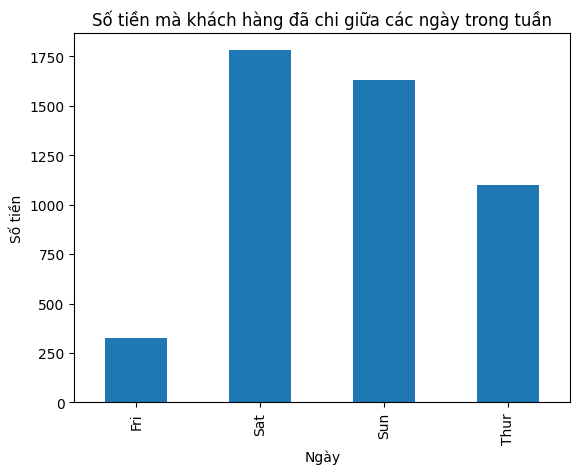

In [28]:
#So sánh số tiền mà khách hàng đã chi giữa các ngày trong tuần.
total_bill_by_day = tip.groupby("day")["total_bill"].sum()
print("Số tiền mà khách hàng đã chi giữa các ngày trong tuần: ")
print(total_bill_by_day)
total_bill_by_day.plot(kind='bar')
plt.title("Số tiền mà khách hàng đã chi giữa các ngày trong tuần")
plt.xlabel("Ngày")
plt.ylabel("Số tiền")
plt.show()

## Với Seaborn

Bạn hãy tìm hiểu và trực quan với thư viện seaborn

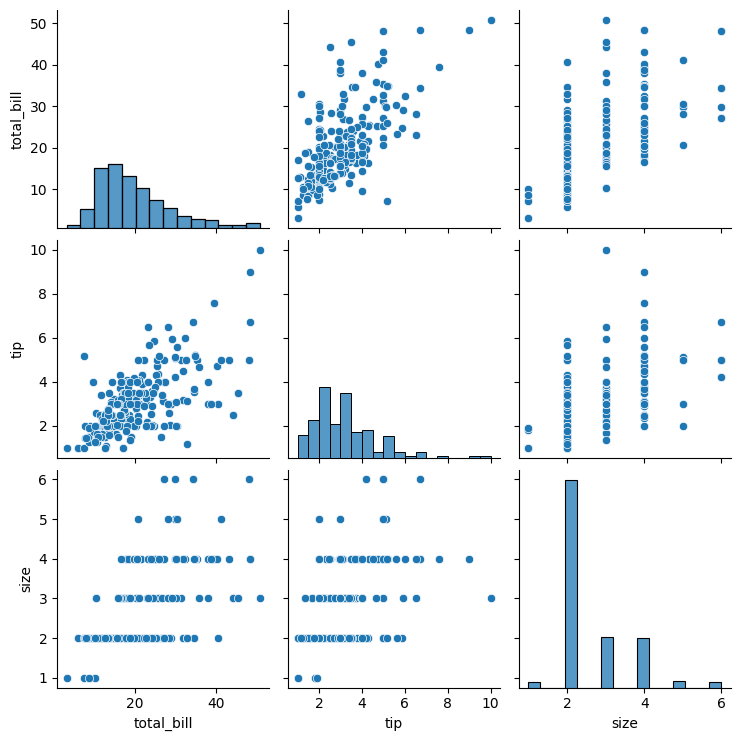

In [29]:
import seaborn as sns
sns.pairplot(tip)
plt.show()
